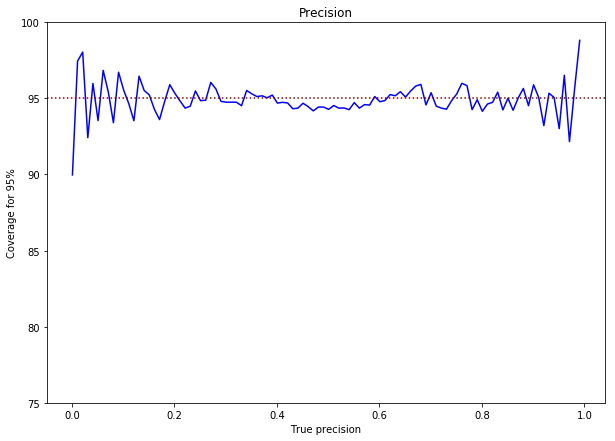

In [3]:
from credible_region import beta
import numpy as np
import matplotlib.pyplot as plt

numSamples = 10000
numTrials = 100

# For precision : propability of binomial = tp/(tp+fp)
proportions = np.arange(0.001, 1, 0.01)
coverage = np.empty(proportions.size)
for index, prop in enumerate(proportions) : 
    tp = np.random.binomial(numTrials, prop, numSamples)
    fp = numTrials - tp
    isCovered = np.empty(numSamples)
    for i in range(numSamples) :
        _,_, lowerCi, upperCi = beta(tp[i], fp[i], 0.5, 0.95)
        isCovered[i] = lowerCi <= prop and prop <= upperCi
    coverage[index] = np.mean(isCovered) * 100

plt.figure(figsize=(10,7))
plt.plot(proportions, coverage, color='blue')
plt.axhline(95, linestyle = 'dotted', color='maroon')
plt.title('Precision')
plt.xlabel('True precision')
plt.ylabel('Coverage for 95%')
plt.ylim([75, 100])
plt.show()

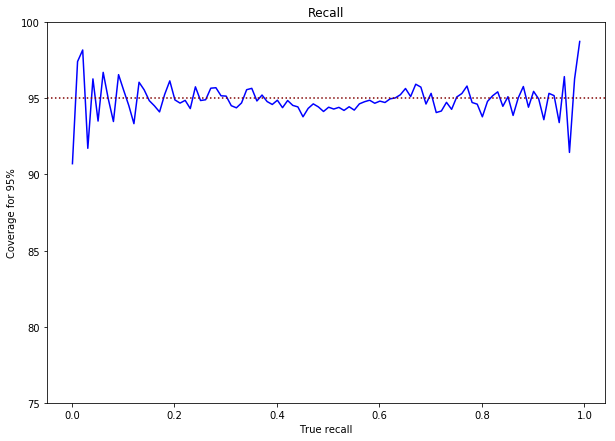

In [4]:
from credible_region import beta
import numpy as np
import matplotlib.pyplot as plt
numSamples = 10000
numTrials = 100

# For recall : propability of binomial = tp/(tp+fn)
proportions = np.arange(0.001, 1, 0.01)
coverage = np.empty(proportions.size)
for index, prop in enumerate(proportions) : 
    tp = np.random.binomial(numTrials, prop, numSamples)
    fn = numTrials - tp
    isCovered = np.empty(numSamples)
    for i in range(numSamples) :
        _,_, lowerCi, upperCi = beta(tp[i], fn[i], 0.5, 0.95)
        isCovered[i] = lowerCi <= prop and prop <= upperCi
    coverage[index] = np.mean(isCovered) * 100

plt.figure(figsize=(10,7))
plt.plot(proportions, coverage, color='blue')
plt.axhline(95, linestyle = 'dotted', color='maroon')
plt.title('Recall')
plt.xlabel('True recall')
plt.ylabel('Coverage for 95%')
plt.ylim([75, 100])
plt.show()

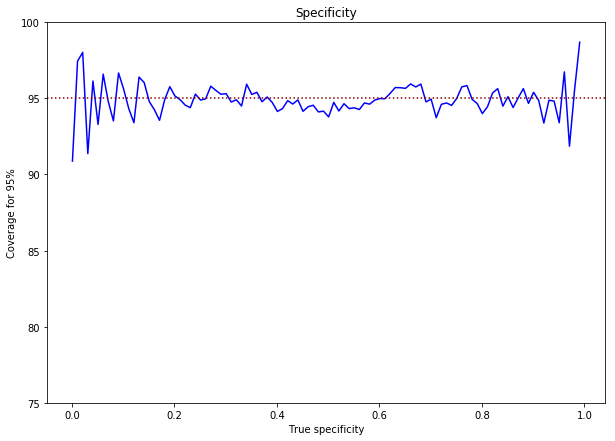

In [72]:
from credible_region import beta
import numpy as np
import matplotlib.pyplot as plt
numSamples = 10000
numTrials = 100

# For specificity : propability of binomial = tn/(tn+fp)
proportions = np.arange(0.001, 1, 0.01)
coverage = np.empty(proportions.size)
for index, prop in enumerate(proportions) : 
    tn = np.random.binomial(numTrials, prop, numSamples)
    fp = numTrials - tn
    isCovered = np.empty(numSamples)
    for i in range(numSamples) :
        _,_, lowerCi, upperCi = beta(tn[i], fp[i], 0.5, 0.95)
        isCovered[i] = lowerCi <= prop and prop <= upperCi
    coverage[index] = np.mean(isCovered) * 100

plt.figure(figsize=(10,7))
plt.plot(proportions, coverage, color='blue')
plt.axhline(95, linestyle = 'dotted', color='maroon')
plt.title('Specificity')
plt.xlabel('True specificity')
plt.ylabel('Coverage for 95%')
plt.ylim([75, 100])
plt.show()

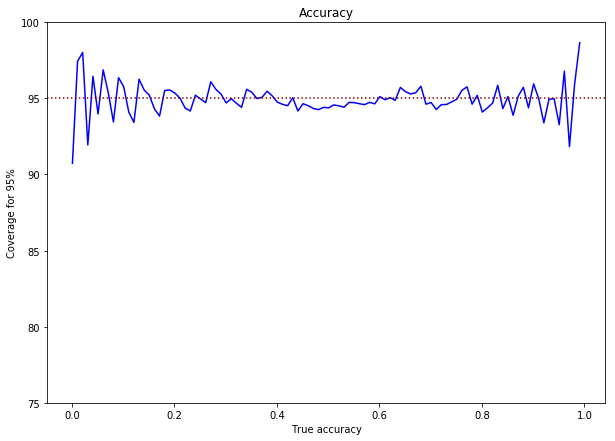

In [73]:
from credible_region import beta
import numpy as np
import matplotlib.pyplot as plt
numSamples = 10000
numTrials = 100

# For accuracy : propability of binomial = (tp+tn)/(tp+tn+fp+fn)
proportions = np.arange(0.001, 1, 0.01)
coverage = np.empty(proportions.size)
for index, prop in enumerate(proportions) : 
    tpAndTn = np.random.binomial(numTrials, prop, numSamples)
    fpAndFn = numTrials - tpAndTn
    isCovered = np.empty(numSamples)
    for i in range(numSamples) :
        _,_, lowerCi, upperCi = beta(tpAndTn[i], fpAndFn[i], 0.5, 0.95)
        isCovered[i] = lowerCi <= prop and prop <= upperCi
    coverage[index] = np.mean(isCovered) * 100

plt.figure(figsize=(10,7))
plt.plot(proportions, coverage, color='blue')
plt.axhline(95, linestyle = 'dotted', color='maroon')
plt.title('Accuracy')
plt.xlabel('True accuracy')
plt.ylabel('Coverage for 95%')
plt.ylim([75, 100])
plt.show()

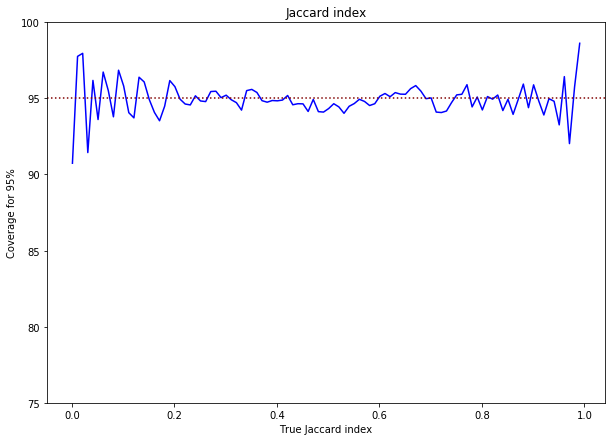

In [75]:
from credible_region import beta
import numpy as np
import matplotlib.pyplot as plt
numSamples = 10000
numTrials = 100

# For Jaccard : propability of binomial = tp/(tp+fp+fn)
proportions = np.arange(0.001, 1, 0.01)
coverage = np.empty(proportions.size)
for index, prop in enumerate(proportions) : 
    tp = np.random.binomial(numTrials, prop, numSamples)
    fpAndFn = numTrials - tp
    isCovered = np.empty(numSamples)
    for i in range(numSamples) :
        _,_, lowerCi, upperCi = beta(tp[i], fpAndFn[i], 0.5, 0.95)
        isCovered[i] = lowerCi <= prop and prop <= upperCi
    coverage[index] = np.mean(isCovered) * 100

plt.figure(figsize=(10,7))
plt.plot(proportions, coverage, color='blue')
plt.axhline(95, linestyle = 'dotted', color='maroon')
plt.title('Jaccard index')
plt.xlabel('True Jaccard index')
plt.ylabel('Coverage for 95%')
plt.ylim([75, 100])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from credible_region import f1_score
import math
import scipy.stats
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


numSamples = 100
numTrials = 100
coverage = 0.95
lambda_ = 0.5


truepositivesprob = np.arange(0.01, 1, 0.01)
truenegativesprob = np.arange(0.01, 1, 0.01)
percentage_covered = np.empty([truepositivesprob.size, truenegativesprob.size])
for index, tpprob in enumerate(truepositivesprob): 
    tpbin = np.random.binomial(numTrials, tpprob, numSamples)
    fnbin = numTrials - tpbin
    tp = int(round(tpprob*numTrials))
    fn = numTrials - tp
    for index1, tnprob in enumerate(truenegativesprob):
        tnbin = np.random.binomial(numTrials, tnprob, numSamples)
        fpbin = numTrials - tnbin
        tn = int(round(tnprob*numTrials))
        fp = numTrials - tn
        F1scores = np.empty(numSamples)
        for i in range(numSamples) :
            if (tpbin[i]+fpbin[i]) == 0 :
                precision = 0
            else :
                precision = tpbin[i] / (tpbin[i]+fpbin[i])
            if (tpbin[i]+fnbin[i]) == 0 :
                recall = 0
            else :
                recall = tpbin[i] / (tpbin[i]+fnbin[i])
            if (precision + recall) == 0 :
                F1 = 0
            else :
                F1 = (2 * precision * recall)/(precision + recall)
            F1scores[i] = F1
        _,_, lowerCi, upperCi = f1_score(tp, fp, fn, lambda_, coverage, 100)
        left_half = (1 - coverage) / 2  # size of excluded (half) area
        sorted_f1scores = np.sort(F1scores)
        lower_index = int(round(numSamples * left_half))
        upper_index = int(round(numSamples * (1 - left_half)))
        reallower = sorted_f1scores[lower_index - 1]
        realupper = sorted_f1scores[upper_index - 1]
        covered_lower = reallower if (reallower > lowerCi) else lowerCi
        covered_upper = realupper if (realupper < upperCi) else upperCi
        percentage_covered[index][index1] = (covered_upper - covered_lower) / (realupper - reallower)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(10, 90)
ax.contour3D(truenegativesprob, truepositivesprob, percentage_covered)



In [12]:
from credible_region import beta
import numpy as np
import matplotlib.pyplot as plt
import random

numTrials = 100

proportions = np.arange(0.01, 1, 0.01)
percentage_covered = np.empty(proportions.size)
for index, prop in enumerate(proportions) : 
    totaltp = np.random.binomial(4*numTrials, prop)
    totalfp = 4*numTrials - totaltp
    pool = np.append(np.zeros(totalfp), np.ones(totaltp))
    np.random.shuffle(pool)
    set1, set2, set3, set4 = np.array_split(pool, 4)
    tp1 = np.count_nonzero(set1)
    fp1 = numTrials - tp1
    tp2 = np.count_nonzero(set2)
    fp2 = numTrials - tp2
    tp3 = np.count_nonzero(set3)
    fp3 = numTrials - tp3
    tp4 = np.count_nonzero(set4)
    fp4 = numTrials - tp4
    
    _,_, lowerCiset1, upperCiset1 = beta(tp1, fp1, 0.5, 0.95)
    _,_, lowerCiset2, upperCiset2 = beta(tp2, fp2, 0.5, 0.95)
    _,_, lowerCiset3, upperCiset3 = beta(tp3, fp3, 0.5, 0.95)
    _,_, lowerCiset4, upperCiset4 = beta(tp4, fp4, 0.5, 0.95)
    lowerCi_mean = (lowerCiset1 + lowerCiset2 + lowerCiset3 + lowerCiset4) / 4
    upperCi_mean = (upperCiset1 + upperCiset2 + upperCiset3 + upperCiset4) / 4
    
    _,_, lowerCi_total, upperCi_total = beta(totaltp, totalfp, 0.5, 0.95)
    
    if lowerCi_mean < lowerCi_total and upperCi_mean > upperCi_total :
        percentage_covered[index] = 1
    elif lowerCi_mean > lowerCi_total and upperCi_mean < upperCi_total :
        percentage_covered[index] = 0
    else :
        percentage_covered[index] = 0.5
            
print(percentage_covered)


[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  0.5]
